# **MA4705 Continual Assessment 1** 
Group: DSP X

Members: Student full name 1 (username 1), Student full name 2 (username 2) 

# **Cleaning Air Talk**

Human speech lies roughly within the spectrum of 20 Hz to 4 kHz. In this exercise, your job is to clean up noisy conversations between the control tower and pilots. Please make use of ONLY the libraries/packages below to complete this exercise. Otherwise, marks will be deducted.

In [4]:
# Use these libraries only for your exercise.

import numpy as np
import librosa
import pickle as pk
import matplotlib
import matplotlib.pyplot as plt
import time
import soundfile as sf
import IPython
from scipy.fft import fft, ifft
from pydub import AudioSegment

## High Frequency Noise 

Add the following audio clips 'noisy_air_talk.wav' to your notebook environment. Play back the audio clip using the method shown below. Notice the high frequency buzz in the background. Let's extract the audio to a variable named 'sig'.

In [6]:
high_freq_noise_audio_file = './noisy_air_talk.wav'

# Digital samples extraction from the audio file.
noisy_wave, sampling_freq = sf.read(high_freq_noise_audio_file)

IPython.display.Audio(high_freq_noise_audio_file)

### a. Spectral analysis of the signal via Fast Fourier Transform (FFT) [4 marks]

Perform a Fast Fourier Transform on the signal and identify the noise spectrum. 

In [21]:
sampling_freq

44100

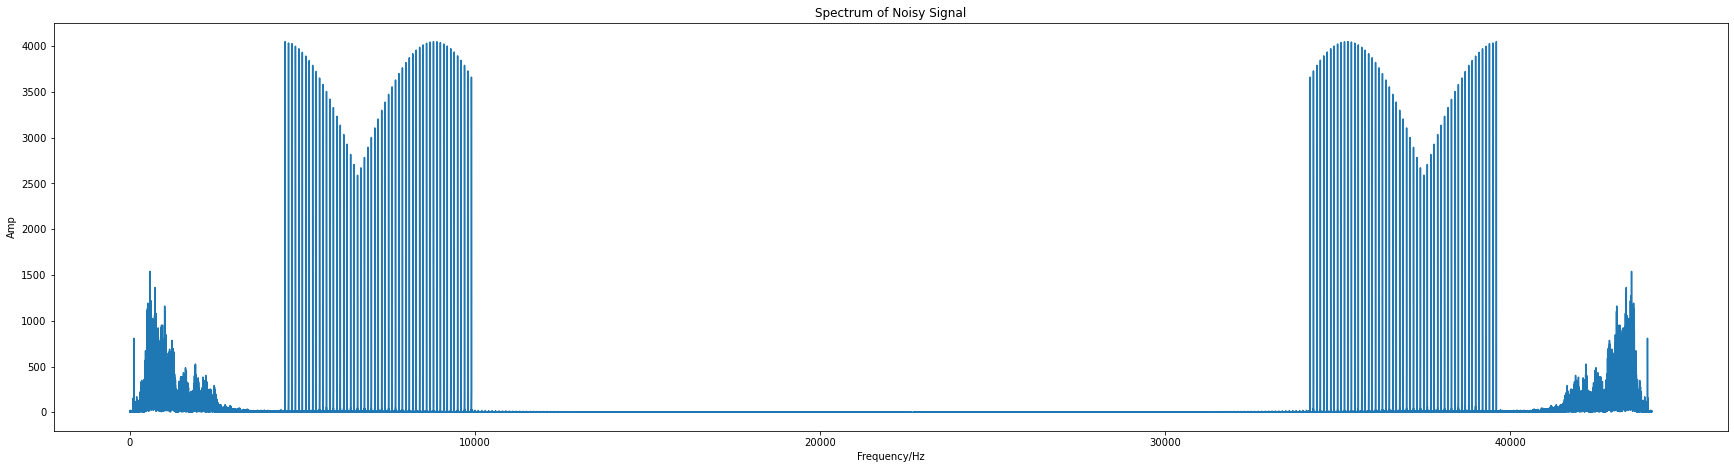

In [19]:
# Carry out FFT here.
frequency = np.arange(len(noisy_wave))*(sampling_freq/len(noisy_wave))
spectrum = np.abs(fft(noisy_wave))

# Plot audio signal amplitude versus frequency.
fig, ax = plt.subplots(figsize=(30,7.5))

ax.plot(frequency, spectrum)
ax.set(xlabel = 'Frequency/Hz',
      ylabel = 'Amp',
      title = 'Spectrum of Noisy Signal')

plt.show()

### b. By means of the inverse FFT, implement the noise removal method and play back the reconstructed waveform. [6 marks]

In [ ]:
# Process spectrum and convert back to the time domain signal.

fft_filtered = ...

# Write fft_filtered to a wav file and play it back.


## Noise

Add the following audio clip 'short_wave.wav' to your notebook environment. This is the clean and crisp audio clip of the conversations. Listen to it and extract the raw samples from the file to a variable named 'original'.

In [ ]:
clean_audio_file = '<PATH TO short_wave.wav>'

# Extract the clean audio waveform.
original, sampling_freq = ...

# Listen to audio here.
IPython.display.Audio(clean_audio_file)

Let's add some noise to clean audio. Since random samples are drawn from a uniform distribution to create a noisy wave. This noise is then added to the original signal.

In [ ]:
# Noise generating method.
def noise_wave(input):
    noise = np.random.uniform(-1.0, 1.0, len(input)).reshape(input.shape)
    output = input + noise
    return output, noise

noisy_wave, noise = noise_wave(original)

Since the noise spectrum is not well defined and overlapped with the desired signal, we cannot make use of a conventional filter with fixed coefficients to clean the signal enough for us. However, we can still remove the noise if we can obtain the noise reference using a second microphone. This is usually imperfect because the amplitude of the noise reference is not the same as the original noise. We simulate this scenario by 'corrupting' the noise signal. 

In [ ]:
# Corrupt the noise to simulate an imperfect noise reference.
# Note that there is a change in noise amplitude as a result of the noise source moving away from the microphone.
def corrupt_noise_reference(self, noise):
    split = round(len(noise)/2)
    remain = len(noise) - split
    noise_ref = np.append(0.5*noise[:split], 0.25*noise[remain:])
    return noise_ref
    
noise_ref = corrupt_noise_reference(noise)

### c. Recover the original signal by subtracting 'noise_ref' from 'noisy_wave' to obtain signal 'naive_reconstruct'. Plot the signals 'noisy_wave', 'noise', 'noise_ref', and 'naive_reconstruct'. Play back the naive_reconstruct signal. [5 marks]   

In [ ]:
# Subtract noise directly from the signal.
naive_reconstruct = ...

# Plot the required charts.

# Play back audio naive_reconstruct


### d. Using the imperfect 'noise_ref' and 'noisy_wave', design an adaptive filter to remove the noise. Plot the original clean signal and the final filtered signal. Write code to play back the filtered signal. [5 marks]

In [ ]:
# Adaptive filter code here.


# Plot the filtered signal here. Compare that visually with the original signal.


# Play back the filtered signal.
